In [5]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

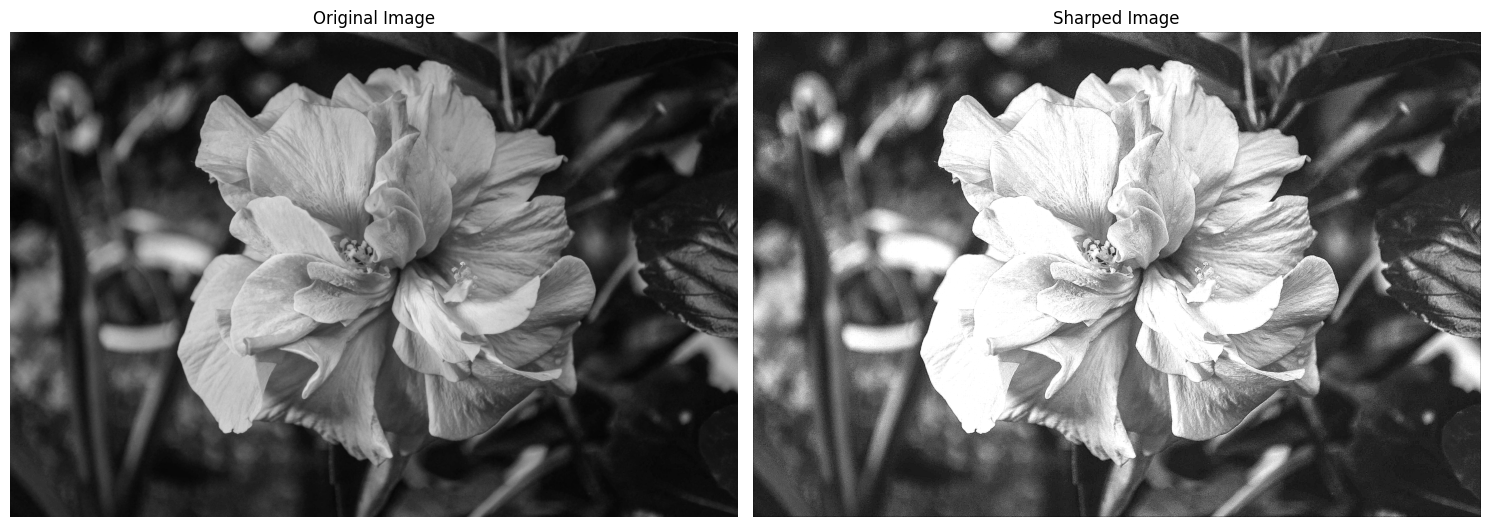

In [6]:
with Image.open('input_images/img6.jpg') as imp_img:
    gray_image = imp_img.convert("L")
    gray_image_array = np.array(gray_image)
    sharpened_image_array32 = np.zeros_like(gray_image_array, dtype=np.float32)
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])

    for i in range(1,len(gray_image_array)-1):
        for j in range(1,len(gray_image_array[0])-1):
            sharpened_image_array32[i][j] = np.sum(gray_image_array[i-1:i+2, j-1:j+2] * kernel)
    
    sharpened_image_arr8 = (sharpened_image_array32*2).clip(0, 255).astype(np.uint8)
    diagonal_image = Image.fromarray(sharpened_image_arr8)
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(gray_image,cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(diagonal_image,cmap='gray')
    plt.title("Sharped Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()